In [1]:
import pandas as pd
import praw

import datetime
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

CLIENT_ID = "Y0idhGvtxNY0oA"
CLIENT_SECRET = "_8nZnFMxafai7a0Mihqy8PCrBIc"
USER_AGENT = f"python:[{CLIENT_ID}:0.1 (by /u/Husky)"

api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

api.read_only

items = []
submissions =  api.subreddit("blockchain").hot(limit = 500)

for submission in submissions:
    #print(dir(submission))
    
    #Convert time and date value to readable format
    time_created = datetime.datetime.fromtimestamp(submission.created)
    
    #time_created = time.ctime(submission.created)
    item = {
        "author_fullname" : submission.author,
        "time_created" : time_created,
        "title" : submission.title,
        "score" : submission.score,
        "num_comments" : submission.num_comments
    }
    items.append(item)

In [2]:
df = pd.DataFrame(items)

In [3]:
df.head()
df["time_created"].dtype

dtype('<M8[ns]')

In [4]:
df['author_fullname'].value_counts().head(10)

Askrypto            12
RemarkablePilot     12
DCC_Official        11
Sandhiyasahi        10
danilhadiwinata      8
HolaAditya           8
Doodersh             6
Admscob              6
d6_purpBlv           6
Cryptx-Financial     6
Name: author_fullname, dtype: int64

In [5]:
df.head()
df.plot(kind='hist', figsize=(10,5), y = 'score', bins=10, title = 'Score' )

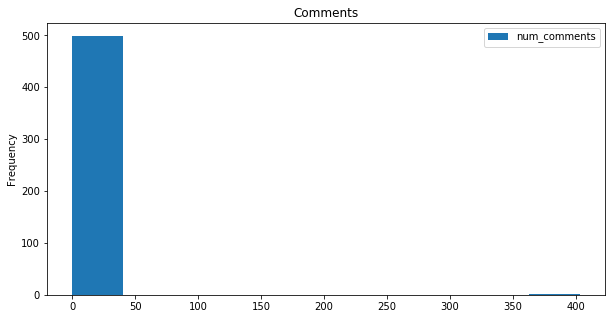

In [41]:
df.head()
df.plot(kind='hist', figsize=(10,5), y = 'num_comments', bins=10, title = 'Comments')

In [42]:

df["created"] = pd.to_datetime(df["time_created"])

df["hour"] = df['created'].map(lambda x: x.hour)
df["day"] = df['created'].map(lambda x: x.day)
df["month"] = df['created'].map(lambda x: x.month)

hour = df["hour"]
day = df["day"]
month = df["month"]

df["hour"]

0      18
1      16
2      19
3      20
4      19
5      19
6      11
7      11
8      21
9      21
10     21
11     20
12     20
13     20
14     20
15     20
16     20
17     20
18     20
19     20
20     19
21     19
22     22
23      7
24     18
25     18
26     18
27     14
28     18
29     17
       ..
470    13
471     9
472    23
473    13
474    19
475    22
476     6
477    12
478     0
479    22
480    11
481    10
482    22
483    10
484    16
485     9
486     9
487    22
488     3
489     5
490     8
491     5
492     8
493    12
494    17
495     7
496    17
497    16
498     1
499     3
Name: hour, Length: 500, dtype: int64

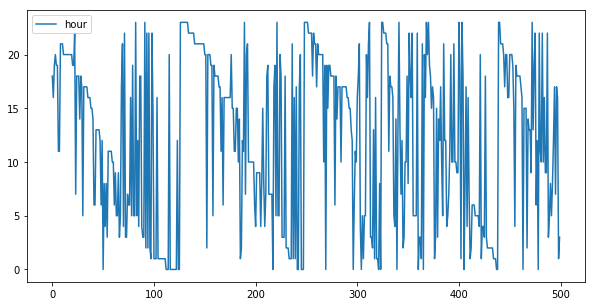

In [51]:
df3 = pd.DataFrame(hour)

df3.plot(kind='line', figsize=(10,5), use_index=False)

In [9]:
df['num_comments'].max()

403

In [38]:
# df = pd.DataFrame(items)
# df3 = pd.to_datetime(df["time_created"])
# hour = df3.dt.day
# hour
# #df.Time.dt.hour
# #df3.strftime('%A')

0       4
1      24
2      24
3      24
4      24
5      24
6      24
7      24
8      24
9      24
10     24
11     24
12     24
13     24
14     24
15     24
16     24
17     24
18     24
19     24
20     24
21     24
22     23
23     24
24     24
25     24
26     24
27     24
28     24
29     24
       ..
470    19
471    19
472    18
473    19
474    18
475    18
476    19
477    19
478    19
479    18
480    19
481    19
482    18
483    19
484    18
485    19
486    19
487    18
488    19
489    19
490    19
491    19
492    19
493    19
494    18
495    19
496    18
497    18
498    19
499    19
Name: time_created, Length: 500, dtype: int64

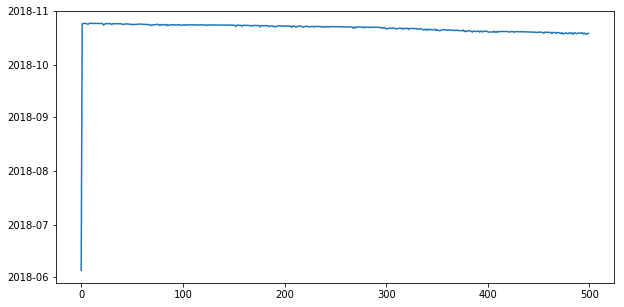

In [40]:
df3.plot(kind='line', figsize=(10,5), y = hour)